## Brain tumor detection using Transfer Learning and Keras
### VGG19 Model

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten , Dropout

In [6]:
image = ('brain_tumor_dataset')

In [7]:
# Print number of images in each folder
print('Number of images in each folder:')
for folder in os.listdir(image):
    print(folder, len(os.listdir(os.path.join(image, folder))))

Number of images in each folder:
no 98
yes 155


In [8]:
# Create a dataframe with the image names and their labels
df = pd.DataFrame(columns=['image', 'label'])
for folder in os.listdir(image):
    for file in os.listdir(os.path.join(image, folder)):
        df = df.append({'image': file, 'label': folder}, ignore_index=True)
df.head()


C:\Users\Mostafizur\AppData\Local\Temp\ipykernel_13900\656082133.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'image': file, 'label': folder}, ignore_index=True)
C:\Users\Mostafizur\AppData\Local\Temp\ipykernel_13900\656082133.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'image': file, 'label': folder}, ignore_index=True)
C:\Users\Mostafizur\AppData\Local\Temp\ipykernel_13900\656082133.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'image': file, 'label': folder}, ignore_index=True)
C:\Users\Mostafizur\AppData\Local\Temp\ipykernel_13900\656082133.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. U

image label
0  1 no.jpeg    no
1  10 no.jpg    no
2  11 no.jpg    no
3  12 no.jpg    no
4  13 no.jpg    no

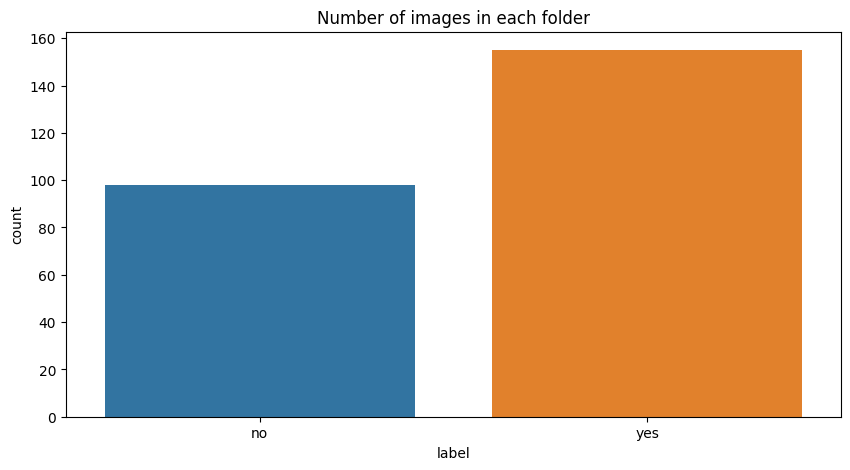

In [9]:
# Plot the number of images in each folder
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=df)
plt.title('Number of images in each folder')
plt.show()

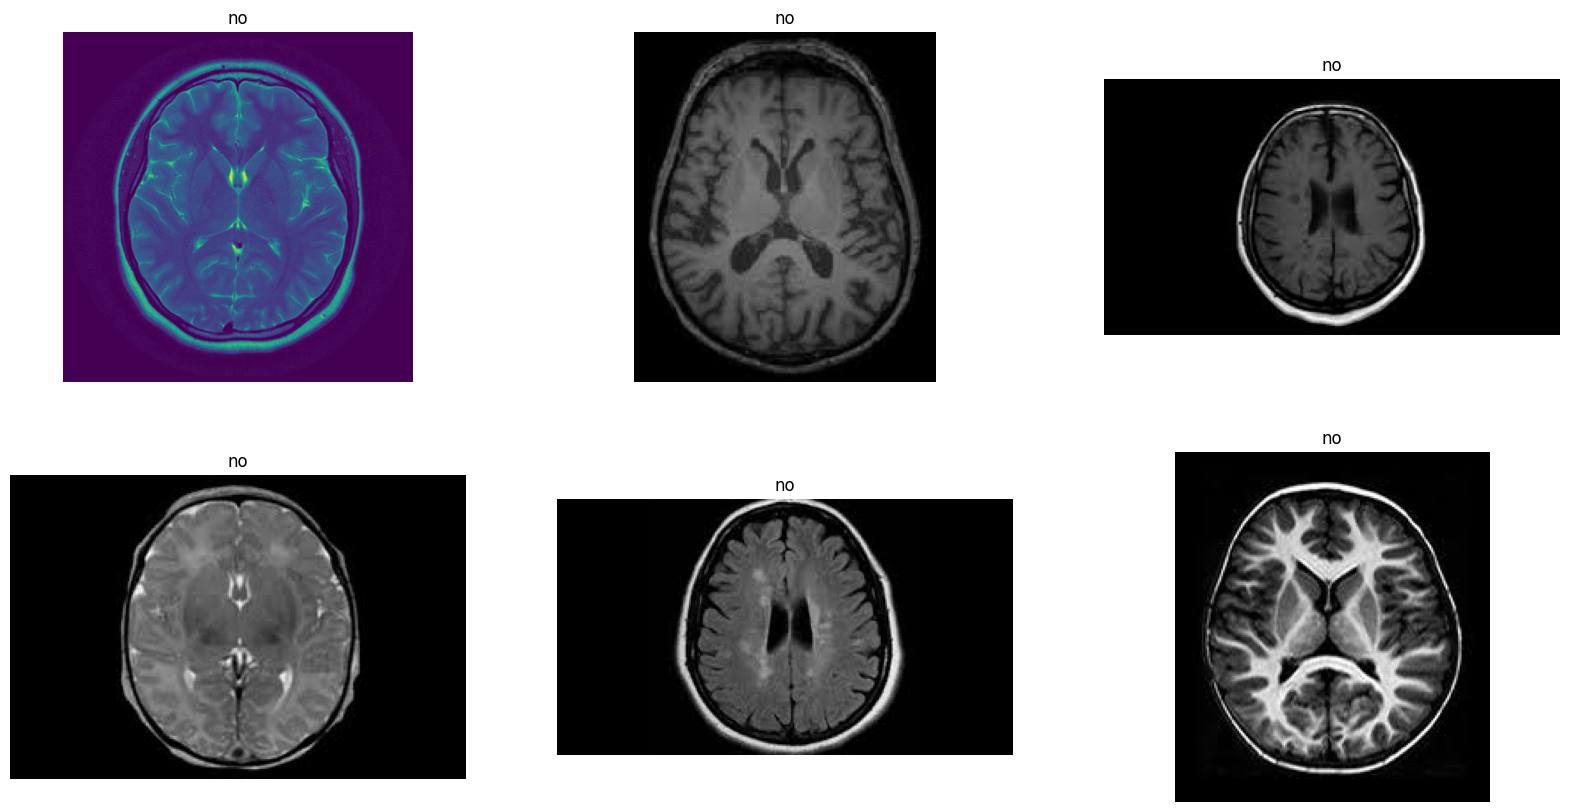

In [10]:
# Print sample images
plt.figure(figsize=(20, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    img = plt.imread(os.path.join(image, df.iloc[i, 1], df.iloc[i, 0]))
    plt.imshow(img)
    plt.title(df.iloc[i, 1])
    plt.axis('off')
plt.show()


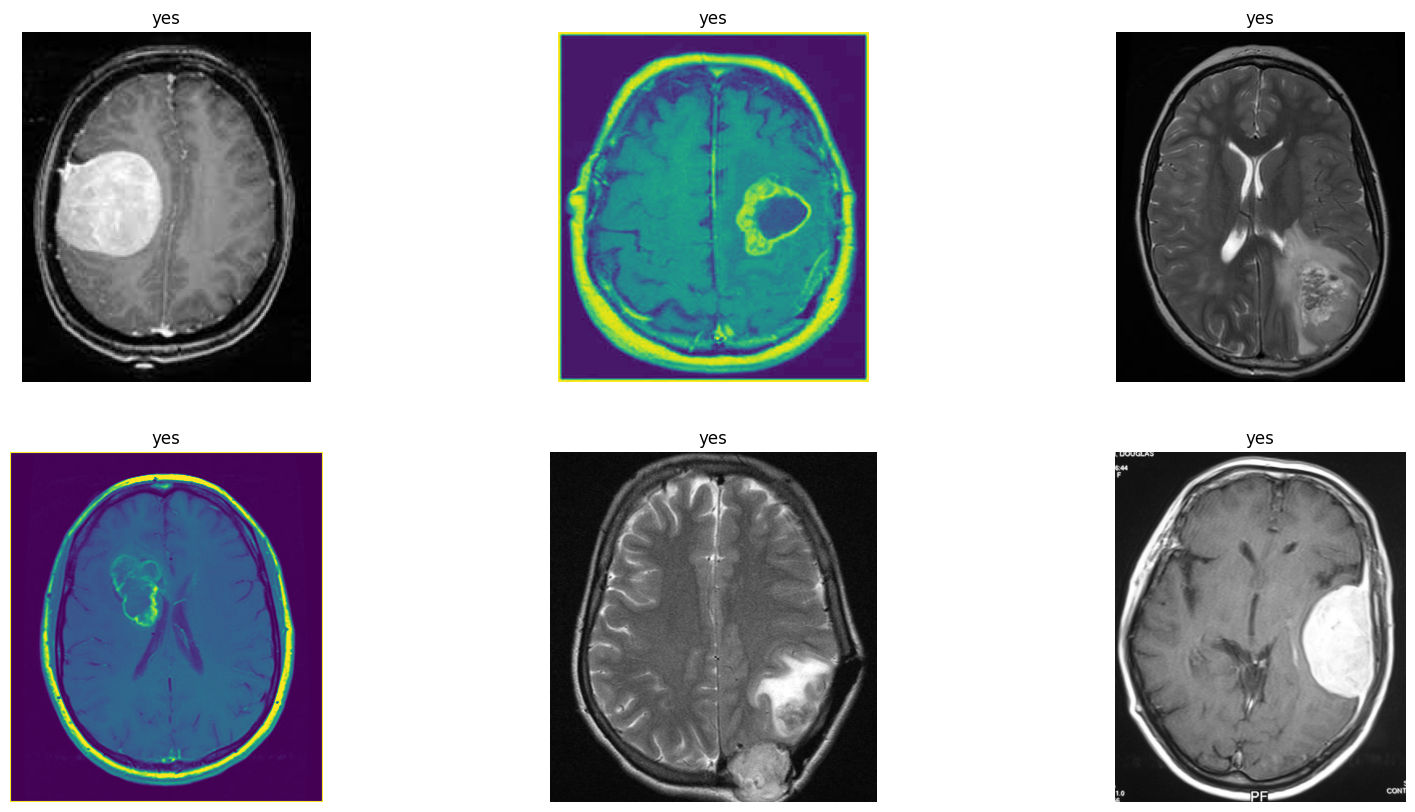

In [11]:
# Print sample images to yes and no folders
plt.figure(figsize=(20, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    img = plt.imread(os.path.join(image, 'yes', df[df['label'] == 'yes'].iloc[i, 0]))
    plt.imshow(img)
    plt.title('yes')
    plt.axis('off')
plt.show()


In [12]:
# VGG19 model
vgg19 = tf.keras.applications.VGG19(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)

In [13]:
# Freeze the layers
for layer in vgg19.layers:
    layer.trainable = False


In [14]:
# Create a sequential model
model = Sequential()


In [15]:
# Add the VGG19 model
model.add(vgg19)
# Add a flatten layer
model.add(Flatten())
# Add a dense layer
model.add(Dense(128, activation='relu'))
# Add a dropout layer
model.add(Dropout(0.5))
# Add a dense layer
model.add(Dense(1, activation='sigmoid'))


In [16]:
# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [17]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 23,235,905
Trainable params: 3,211,521
Non-trainable params: 20,024,384
_________________________________________________________________


In [18]:
image = ('brain_tumor_dataset')

# Create an image data generator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [19]:
# Create train and validation generators
train_generator = datagen.flow_from_directory(
    image,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Found 203 images belonging to 2 classes.


In [20]:
# Create train and validation generators
validation_generator = datagen.flow_from_directory(
    image,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 50 images belonging to 2 classes.


In [21]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    verbose=1
)

Epoch 1/10
7/7 [==============================] - 144s 21s/step - loss: 2.1592 - accuracy: 0.5616 - val_loss: 0.5904 - val_accuracy: 0.7600
Epoch 2/10
7/7 [==============================] - 113s 18s/step - loss: 0.6959 - accuracy: 0.7094 - val_loss: 0.5410 - val_accuracy: 0.7600
Epoch 3/10
7/7 [==============================] - 118s 17s/step - loss: 0.4842 - accuracy: 0.7833 - val_loss: 0.4810 - val_accuracy: 0.7800
Epoch 4/10
7/7 [==============================] - 112s 16s/step - loss: 0.4290 - accuracy: 0.8424 - val_loss: 0.4680 - val_accuracy: 0.7600
Epoch 5/10
7/7 [==============================] - 118s 17s/step - loss: 0.3622 - accuracy: 0.8571 - val_loss: 0.4985 - val_accuracy: 0.7600
Epoch 6/10
7/7 [==============================] - 114s 17s/step - loss: 0.3294 - accuracy: 0.8522 - val_loss: 0.4302 - val_accuracy: 0.7400
Epoch 7/10
7/7 [==============================] - 115s 16s/step - loss: 0.3368 - accuracy: 0.8473 - val_loss: 0.3871 - val_accuracy: 0.7800
Epoch 8/10
7/7 [====

Text(0.5, 1.0, 'Model accuracy')

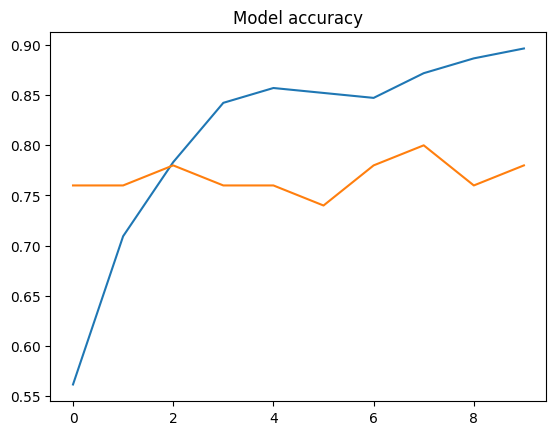

In [22]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')

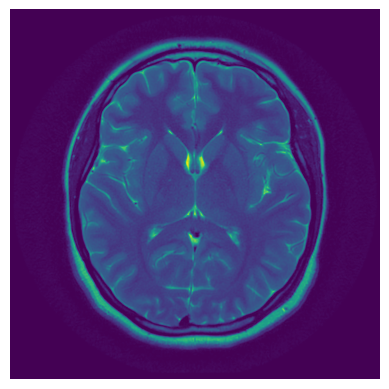

In [23]:
# Predict images
image = ('brain_tumor_dataset/no/1 no.jpeg')
img = plt.imread(image)
plt.imshow(img)
plt.axis('off')
plt.show()

In [24]:
# predict the image
img = tf.keras.preprocessing.image.load_img(image, target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255
prediction = model.predict(img)
print('Prediction:', prediction)

1/1 [==============================] - 1s 847ms/step
Prediction: [[0.05470834]]


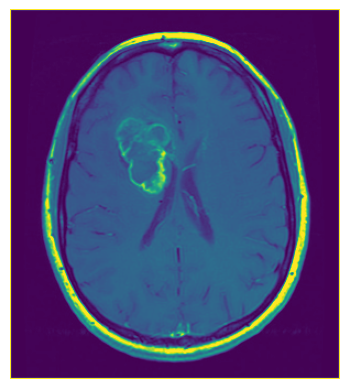

In [40]:
# Predict images yes or no 
image = ('brain_tumor_dataset//yes/Y101.jpg')
img = plt.imread(image)
plt.imshow(img)
plt.axis('off')
plt.show()


In [41]:
# predicting image using if else 
img = tf.keras.preprocessing.image.load_img(image, target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255
prediction = model.predict(img)
if prediction > 0.5:
    print('Prediction: yes')
else:
    print('Prediction: no')
    

1/1 [==============================] - 1s 590ms/step
Prediction: yes


In [27]:
# Save the model
model.save('brain_tumor.h5')


In [32]:
# model checking
from tensorflow.keras.models import load_model
model = load_model('brain_tumor.h5')

In [31]:
# save the model in tflite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("brain_tumor.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\MOSTAF~1\AppData\Local\Temp\tmp9okddnjx\assets


INFO:tensorflow:Assets written to: C:\Users\MOSTAF~1\AppData\Local\Temp\tmp9okddnjx\assets


92955772

In [29]:
# check the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 23,235,905
Trainable params: 3,211,521
Non-trainable params: 20,024,384
_________________________________________________________________


In [30]:
# Accuracy of the saved model
score = model.evaluate(validation_generator)
print('Accuracy:', score[1])

2/2 [==============================] - 22s 8s/step - loss: 0.3705 - accuracy: 0.7800
Accuracy: 0.7799999713897705
